In [1]:
import numpy as np
from random import choice
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import pandas as pd

In [2]:
def DLA(rows,columns,itrn):
    arr = np.zeros((rows,columns))
    arr[int((rows-1)/2)+1][int((columns-1)/2)+1] = 1
    x = [int((rows-1)/2)+1]
    y = [int((columns-1)/2)+1]

    for i in range(itrn): 
        ran_indx = random.randrange(0,columns-1)
        start_pt = choice([(ran_indx,0),(ran_indx,columns-1),(0,ran_indx),(rows-1,ran_indx)])
        #start_pt = (0,0)
        arr[start_pt[0]][start_pt[1]] = 1
        x1 = max(start_pt[0]-1,0)
        x2 = min(start_pt[0]+1,rows-1)
        y1 = max(start_pt[1]-1,0)
        y2 = min(start_pt[1]+1,columns-1)
        slic = arr[x1:x2+1,y1:y2+1]
        #print(x1,x2,y1,y2)
        #print(slic)
        #print(np.sum(slic == 1))

        #count = 0
        #print("start_pt: ",start_pt)
        while(np.sum(slic == 1)== 1):
         
                if(start_pt == (0,0)):
                    rand_move = choice([(0,1),(1,0),(1,1)])
                elif(start_pt == (rows-1,0)):
                    rand_move = choice([(0,1),(-1,0),(-1,1)])
                elif(start_pt == (0,columns-1)):
                    rand_move = choice([(1,0),(0,-1),(1,-1)])
                elif(start_pt == (rows-1,columns-1)):
                    rand_move = choice([(0,-1),(-1,0),(-1,-1)])
                elif(start_pt[1] == 0 and start_pt != (0,0) and start_pt != (rows-1,0)):
                    rand_move = choice([(0,1),(1,0),(-1,0),(1,1),(-1,1)])
                elif(start_pt[1] == columns-1 and start_pt != (0,columns-1) and start_pt != (rows-1,columns-1)):
                    rand_move = choice([(0,-1),(1,0),(-1,0),(1,-1),(-1,-1)])
                elif(start_pt[0] == 0 and start_pt != (0,0) and start_pt != (0,columns-1)):
                    rand_move = choice([(0,-1),(0,1),(1,0),(1,1),(1,-1)])
                elif(start_pt[0] == rows-1 and start_pt != (rows-1,0) and start_pt != (rows-1,columns-1)):
                    rand_move = choice([(0,-1),(0,1),(-1,0),(-1,1),(-1,-1)])
                else:
                    rand_move = choice([(0,-1),(0,1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)])
        
                arr[start_pt[0]][start_pt[1]] = 0
                start_pt = (start_pt[0]+rand_move[0],start_pt[1]+rand_move[1])
                arr[start_pt[0]][start_pt[1]] = 1
                #print("rand_move in each iteration: ", rand_move)
                #print("start_pt after each random walk: ",start_pt )
                x1 = max(start_pt[0]-1,0)
                x2 = min(start_pt[0]+1,rows-1)
                y1 = max(start_pt[1]-1,0)
                y2 = min(start_pt[1]+1,columns-1)
                slic = arr[x1:x2+1,y1:y2+1]       
                #count+=1
                continue
        
        #print("count of iterations: ",count)    
        x.append(start_pt[0])
        y.append(start_pt[1])

    return(x,y)
    
    


               
    

Enter the number of rows: 100
Enter the number of columns: 100
Enter the number of iterations:100


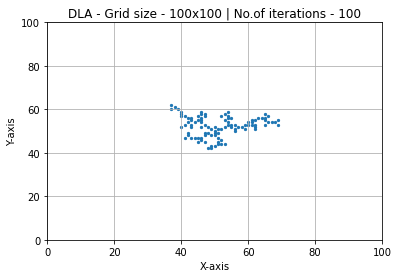

In [5]:
#x,y = DLA(rows = 100,columns = 100,itrn = 100)
rows = int(input("Enter the number of rows: "))
columns = int(input("Enter the number of columns: "))
itrn = int(input("Enter the number of iterations:"))
x,y = DLA(rows,columns,itrn)

#plt.xlim(0-.5*rows,rows*1.5)
#plt.ylim(0-.5*columns,columns*1.5)

plt.xlim(0,rows)
plt.ylim(0,columns)
plt.scatter(x, y, s=5)
plt.title(f"DLA - Grid size - {rows}x{columns} | No.of iterations - {itrn}")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()

    
plt.savefig(f'Grid_{rows}x{columns}_{itrn}iterations.png') 


In [11]:
#This will generate the list of coordinates


coord = list(zip(*list([x,y])))
print(coord)

dictn = {"X": x, "Y":y}
df = pd.DataFrame(dictn)
df.to_csv(f'Grid_{rows}x{columns}_{itrn}iterations.csv')


[(126, 126), (125, 126), (124, 127), (126, 125), (127, 126), (123, 126), (125, 124), (126, 123), (125, 122), (123, 128), (124, 121), (123, 122), (125, 120), (122, 128), (122, 129), (122, 121), (122, 123), (121, 128), (123, 130), (128, 127), (124, 119), (127, 122), (120, 129), (121, 121), (124, 130), (124, 118), (120, 130), (125, 117), (119, 130), (123, 117), (121, 131), (127, 121), (126, 117), (120, 120), (129, 128), (118, 129), (118, 131), (117, 132), (119, 120), (127, 116), (128, 125), (128, 117), (117, 128), (116, 133), (129, 125), (115, 133), (130, 126), (127, 115), (129, 118), (116, 128), (122, 132), (128, 114), (129, 117), (115, 128), (120, 132), (114, 134), (114, 132), (113, 135), (127, 113), (127, 112), (118, 120), (112, 136), (118, 119), (128, 122), (119, 118), (128, 113), (118, 133), (130, 127), (128, 128), (123, 133), (127, 111), (118, 134), (113, 131), (130, 128), (131, 129), (124, 134), (126, 110), (113, 130), (130, 119), (130, 117), (112, 130), (131, 119), (132, 128), (11